In [176]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [177]:
evi_n = [943.2422, 680.0412, 600.0843, 639.7426, 690.1161, 563.3386, 
    312.0294, 174.9583, 191.1664, 730.8361, 1193.495, 947.6123]
bute = [213.8115, 195.2005, 184.7285, 229.9983, 529.6431, 1004.064, 1298.308, 
    1160.557, 719.7251, 441.6413, 328.339, 268.2548]
evi_n = np.array(bute + bute + bute)

In [178]:
months = pd.date_range(start='2018/01', end='2021/01', freq='SM')
months = np.array(months[0::2])
months[1] = datetime.datetime(2018, 2, 14)
months[13] = datetime.datetime(2019, 2, 14)
months[25] = datetime.datetime(2020, 2, 14)

print (months)

['2018-01-15T00:00:00.000000000' '2018-02-14T00:00:00.000000000'
 '2018-03-15T00:00:00.000000000' '2018-04-15T00:00:00.000000000'
 '2018-05-15T00:00:00.000000000' '2018-06-15T00:00:00.000000000'
 '2018-07-15T00:00:00.000000000' '2018-08-15T00:00:00.000000000'
 '2018-09-15T00:00:00.000000000' '2018-10-15T00:00:00.000000000'
 '2018-11-15T00:00:00.000000000' '2018-12-15T00:00:00.000000000'
 '2019-01-15T00:00:00.000000000' '2019-02-14T00:00:00.000000000'
 '2019-03-15T00:00:00.000000000' '2019-04-15T00:00:00.000000000'
 '2019-05-15T00:00:00.000000000' '2019-06-15T00:00:00.000000000'
 '2019-07-15T00:00:00.000000000' '2019-08-15T00:00:00.000000000'
 '2019-09-15T00:00:00.000000000' '2019-10-15T00:00:00.000000000'
 '2019-11-15T00:00:00.000000000' '2019-12-15T00:00:00.000000000'
 '2020-01-15T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-04-15T00:00:00.000000000'
 '2020-05-15T00:00:00.000000000' '2020-06-15T00:00:00.000000000'
 '2020-07-15T00:00:00.000

In [179]:
df = pd.DataFrame(evi_n, months, columns=['WSflux'])

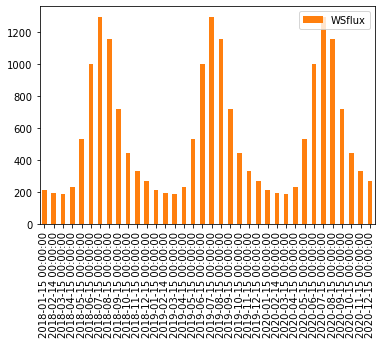

In [180]:
df.plot.bar(color='tab:orange');

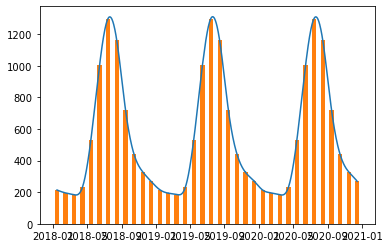

In [181]:
sdaily = df.resample('1D').interpolate(method='spline', order=3)
fig, ax = plt.subplots(1, 1)
ax.bar(df.index, df.WSflux, color='tab:orange', width=15)
ax.plot(sdaily.index, sdaily.WSflux);

In [182]:
monthlymeans = sdaily.resample('1M').mean()
df2 = pd.DataFrame(monthlymeans.values, months, columns=['WSflux']) - df

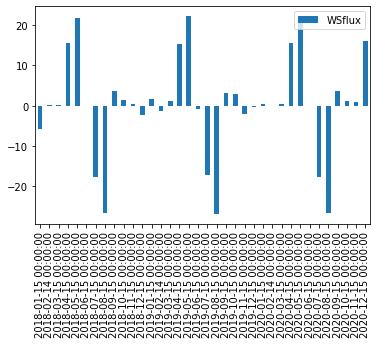

In [183]:
df2.plot.bar();

In [184]:
def one_iteration(months, So):
    sdaily = So.resample('1D').interpolate(method='cubic', order=3)
    monthlymeans = sdaily.resample('1M').mean()
    S1 = pd.DataFrame(monthlymeans.values, months, columns=['WSflux']) - So
    return sdaily, S1 

# Iterate

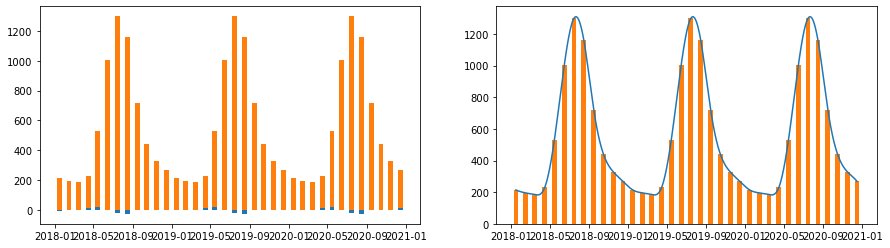

In [185]:
So = pd.DataFrame(evi_n, months, columns=['WSflux'])
sdaily1, S1 = one_iteration(months, So)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[0].bar(S1.index, S1.WSflux, color='tab:blue', width=15)
axs[1].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[1].plot(sdaily1.index, sdaily1.WSflux);

21.89617096190659 3.053456071896097 184.7285


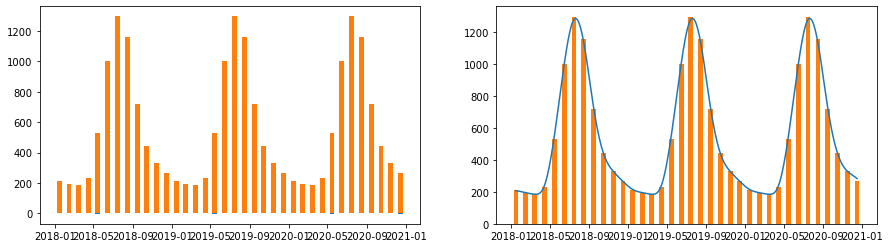

In [186]:
sdaily2, S2 = one_iteration(months, S1)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[0].bar(S2.index, S2.WSflux, color='tab:blue', width=15)
axs[1].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[1].plot(sdaily1.index, sdaily1.WSflux + sdaily2.WSflux);
print(S1.WSflux[12:-12].max(), S2.WSflux[12:-12].max(), So.WSflux.min())

21.89617096190659 3.053456071896097 0.5519733713220027 184.7285
0.0029880249735260273


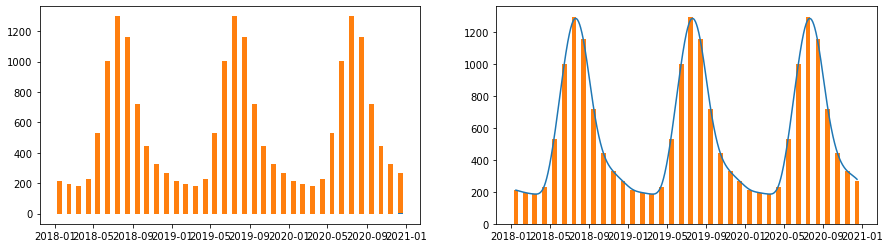

In [187]:
sdaily3, S3 = one_iteration(months, S2)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[0].bar(S3.index, S3.WSflux, color='tab:blue', width=15)
axs[1].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[1].plot(sdaily1.index, sdaily1.WSflux + sdaily2.WSflux + sdaily3.WSflux);
print(S1.WSflux[12:-12].max(), S2.WSflux[12:-12].max(), S3.WSflux[12:-12].max(), So.WSflux.min())
print( S3.WSflux[12:-12].max() / So.WSflux.min())

26.147598063108262 3.053456071896097 0.5519733713220027 0.22006422645604684 184.7285
0.0011912846499378647


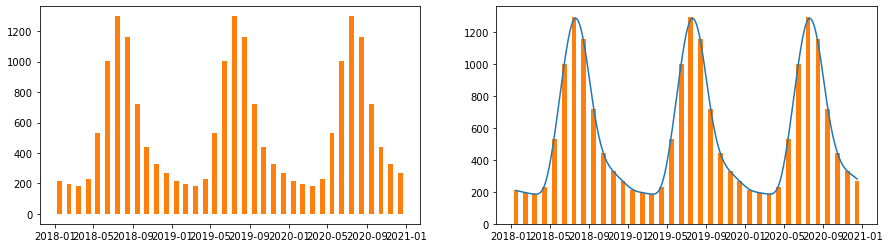

In [188]:
sdaily4, S4 = one_iteration(months, S3)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[0].bar(S4.index, S4.WSflux, color='tab:blue', width=15)
axs[1].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[1].plot(sdaily1.index, sdaily1.WSflux + sdaily2.WSflux + sdaily3.WSflux + sdaily4.WSflux);
print(S1.WSflux[12:-12].abs().max(), S2.WSflux[12:-12].abs().max(), S3.WSflux[12:-12].max(), 
      S4.WSflux[12:-12].abs().max(), So.WSflux.min())
print(S4.WSflux[12:-12].abs().max() / So.WSflux.min())

26.147598063108262 3.053456071896097 0.5519733713220027 0.22006422645604684 0.07227902944566234 184.7285
0.0003912716740820303


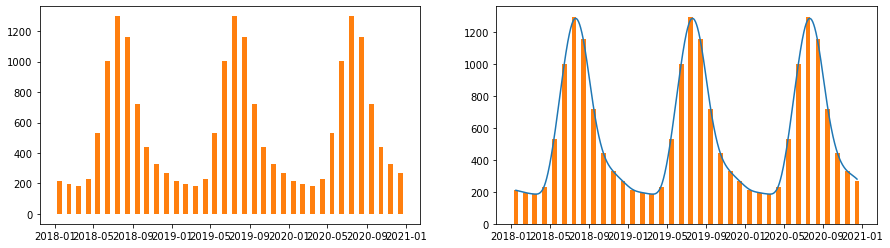

In [189]:
sdaily5, S5 = one_iteration(months, S4)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[0].bar(S5.index, S5.WSflux, color='tab:blue', width=15)
axs[1].bar(So.index, So.WSflux, color='tab:orange', width=15)
axs[1].plot(sdaily1.index, sdaily1.WSflux + sdaily2.WSflux + sdaily3.WSflux + sdaily4.WSflux +
           sdaily5.WSflux);
print(S1.WSflux[12:-12].abs().max(), S2.WSflux[12:-12].abs().max(), S3.WSflux[12:-12].max(), 
      S4.WSflux[12:-12].abs().max(), S5.WSflux[12:-12].abs().max(), So.WSflux.min())
print(S5.WSflux[12:-12].abs().max() / So.WSflux.min())

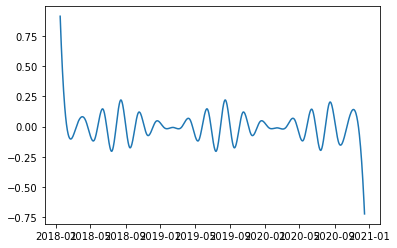

In [190]:
#plt.plot(sdaily1.index, sdaily1.WSflux)
#plt.plot(sdaily2.index, sdaily2.WSflux)
#plt.plot(sdaily3.index, sdaily3.WSflux)
#plt.plot(sdaily4.index, sdaily4.WSflux)
plt.plot(sdaily5.index, sdaily5.WSflux)


(737060.0, 737424.0)

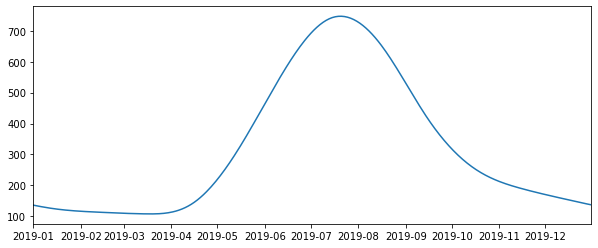

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(sdaily1.index, 0.58*(sdaily1.WSflux + sdaily2.WSflux + sdaily3.WSflux + sdaily4.WSflux +
           sdaily5.WSflux));
ax.set_xlim(datetime.datetime(2019, 1, 1), datetime.datetime(2019, 12, 31))